# NumPy: Numerical Arrays for Python

**Learning Objectives:** Learn how to create, transform and visualize multidimensional data of a single type using Numpy. 

NumPy is the foundation for scientific computing and data science in Python. Its more data object is a multidimensional array with the following characteristics:

* Any number of dimensions
* All elements of an array have the same data type
* Array elements are usually native data dtype
* The memory for an array is a contiguous block that can be easily passed to other numerical libraries (BLAS, LAPACK, etc.).
* Most of NumPy is implemented in C, so it is fast.

## Plotting

While this notebook doesn't focus on plotting, Matplotlib will be used to make a few basic plots.

In [113]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

The `vizarray` package will be used to visualize NumPy arrays:

In [114]:
import antipackage
from github.ellisonbg.misc import vizarray as va

## Multidimensional array type

This is the canonical way you should import Numpy:

In [115]:
import numpy as np

In [116]:
data = [0,2,4,6]
a = np.array(data)

In [117]:
type(a)

numpy.ndarray

In [118]:
a

array([0, 2, 4, 6])

The `vz.vizarray` function can be used to visualize a 1d or 2d NumPy array using a colormap:

In [119]:
va.vizarray(a)

,,,


The shape of the array:

In [120]:
a.shape

(4,)

The number of array dimensions:

In [121]:
a.ndim

1

The number of array elements:

In [122]:
a.size

4

The number of bytes the array takes up:

In [123]:
a.nbytes

32

The `dtype` attribute describes the "data type" of the elements:

In [124]:
a.dtype

dtype('int64')

## Creating arrays

Arrays can be created with nested lists or tuples:

In [125]:
data = [[0.0,2.0,4.0,6.0],[1.0,3.0,5.0,7.0]]
b = np.array(data)

In [126]:
b

array([[ 0.,  2.,  4.,  6.],
       [ 1.,  3.,  5.,  7.]])

In [127]:
va.vizarray(b)

,,,
,,,


In [128]:
b.shape, b.ndim, b.size, b.nbytes

((2, 4), 2, 8, 64)

The `arange` function is similar to Python's builtin `range` function, but creates an array:

In [129]:
c = np.arange(0.0, 10.0, 1.0) # Step size of 1.0
c

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

The `linspace` function is similar, but allows you to specify the number of points:

In [130]:
e = np.linspace(0.0, 5.0, 11) # 11 points
e

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ])

There are also `empty`, `zeros` and `ones` functions:

In [131]:
np.empty((4,4))

array([[ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.]])

In [132]:
np.zeros((3,3))

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [133]:
np.ones((3,3))

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

See also:

* `empty_like`, `ones_like`, `zeros_like`
* `eye`, `identity`, `diag`

## dtype

Arrays have a `dtype` attribute that encapsulates the "data type" of each element. It can be set:

* Implicitely by the element type
* By passing the `dtype` argument to an array creation function

Here is an integer valued array:

In [134]:
a = np.array([0,1,2,3])

In [135]:
a, a.dtype

(array([0, 1, 2, 3]), dtype('int64'))

All array creation functions accept an optional `dtype` argument:

In [136]:
b = np.zeros((2,2), dtype=np.complex64)
b

array([[ 0.+0.j,  0.+0.j],
       [ 0.+0.j,  0.+0.j]], dtype=complex64)

In [137]:
c = np.arange(0, 10, 2, dtype=np.float)
c

array([ 0.,  2.,  4.,  6.,  8.])

You can use the `astype` method to create a copy of the array with a given `dtype`:

In [138]:
d = c.astype(dtype=np.int)
d

array([0, 2, 4, 6, 8])

IPython's tab completion is useful for exploring the various available `dtypes`:

In [139]:
np.float*?

The NumPy documentation on [dtypes](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html) describes the many other ways of specifying dtypes.

## Array operations

Basic mathematical operations are **elementwise** for:

* Scalars and arrays
* Arrays and arrays

Fill an array with a value:

In [140]:
a = np.empty((3,3))
a.fill(0.1)
a

array([[ 0.1,  0.1,  0.1],
       [ 0.1,  0.1,  0.1],
       [ 0.1,  0.1,  0.1]])

In [141]:
b = np.ones((3,3))
b

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.]])

Addition is elementwise:

In [142]:
a+b

array([[ 1.1,  1.1,  1.1],
       [ 1.1,  1.1,  1.1],
       [ 1.1,  1.1,  1.1]])

Division is elementwise:

In [143]:
b/a

array([[ 10.,  10.,  10.],
       [ 10.,  10.,  10.],
       [ 10.,  10.,  10.]])

As are powers:

In [144]:
a**2

array([[ 0.01,  0.01,  0.01],
       [ 0.01,  0.01,  0.01],
       [ 0.01,  0.01,  0.01]])

Scalar multiplication is also elementwise:

In [145]:
np.pi*b

array([[ 3.14159265,  3.14159265,  3.14159265],
       [ 3.14159265,  3.14159265,  3.14159265],
       [ 3.14159265,  3.14159265,  3.14159265]])

## Indexing and slicing

Indexing and slicing provide an efficient way of getting the values in an array and modifying them.

In [146]:
a = np.random.rand(10,10)

The `enable` function is part of `vizarray` and enables a nice display of arrays:

In [147]:
va.enable()

In [148]:
a

,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


List Python lists and tuples, NumPy arrays have zero-based indexing and use the `[]` syntax for getting and setting values:

In [149]:
a[0,0]

0.36608970303976629

An index of `-1` refers to the last element along that axis:

In [150]:
a[-1,-1] == a[9,9]

True

Extract the 0th column using the `:` syntax, which denotes all elements along that axis.

In [151]:
a[:,0]

,,,,,,,,,


The last row:

In [152]:
a[-1,:]

,,,,,,,,,


You can also slice ranges:

In [153]:
a[0:2,0:2]

,
,


Assignment also works with slices:

In [154]:
a[0:5,0:5] = 1.0

In [155]:
a

,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,
,,,,,,,,,


Note how even though we assigned the value to the slice, the original array was changed. This clarifies that slices are **views** of the same data, not a copy.

In [156]:
va.disable()

### Boolean indexing

Arrays can be indexed using other arrays that have boolean values.

In [157]:
ages = np.array([23,56,67,89,23,56,27,12,8,72])
genders = np.array(['m','m','f','f','m','f','m','m','m','f'])

Boolean expressions involving arrays create new arrays with a `bool` dtype and the elementwise result of the expression:

In [158]:
ages > 30

array([False,  True,  True,  True, False,  True, False, False, False,  True], dtype=bool)

In [159]:
genders == 'm'

array([ True,  True, False, False,  True, False,  True,  True,  True, False], dtype=bool)

Boolean expressions provide an extremely fast and flexible way of querying arrays:

In [160]:
(ages > 10) & (ages < 50)

array([ True, False, False, False,  True, False,  True,  True, False, False], dtype=bool)

You can use a boolean array to index into the original or another array. This selects the ages of all females in the `genders` array:

In [161]:
mask = (genders == 'f')
ages[mask]

array([67, 89, 56, 72])

In [162]:
ages[ages>30]

array([56, 67, 89, 56, 72])

## Reshaping, transposing

In [163]:
va.enable()

In [164]:
a = np.random.rand(3,4)

In [165]:
a

,,,
,,,
,,,


The `T` atrribute contains the transpose of the original array:

In [166]:
a.T

,,
,,
,,
,,


The `reshape` method can be used to change the shape and even the number of dimensions:

In [167]:
a.reshape(2,6)

,,,,,
,,,,,


In [168]:
a.reshape(6,2)

,
,
,
,
,
,


The `ravel` method strings the array out in one dimension:

In [169]:
a.ravel()

,,,,,,,,,,,


In [170]:
va.disable()

## Universal functions

Universal function, or "ufuncs," are functions that take and return arrays or scalars. They have the following characteristics:

* Vectorized C implementations, much faster than hand written loops in Python
* Allow for concise Pythonic code
* Here is a complete list of the [available NumPy ufuncs](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs) lists the available ufuncs.

In [171]:
va.set_block_size(5)
va.enable()

Here is a linear sequence of values"

In [172]:
t = np.linspace(0.0, 4*np.pi, 100)
t

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


Take the $sin$ of each element of the array:

In [173]:
np.sin(t)

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


As the next two examples show, multiple ufuncs can be used to create complex mathematical expressions that can be computed efficiently:

In [174]:
np.exp(np.sqrt(t))

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [175]:
va.disable()
va.set_block_size(30)

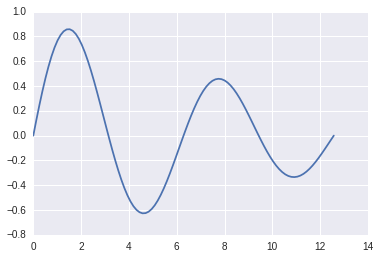

In [176]:
plt.plot(t, np.exp(-0.1*t)*np.sin(t))

In general, you should always try to use ufuncs rather than do computations using for loops. These types of array based computations are referred to as *vectorized*.

## Basic data processing

In [177]:
ages = np.array([23,56,67,89,23,56,27,12,8,72])
genders = np.array(['m','m','f','f','m','f','m','m','m','f'])

Numpy has a basic set of methods and function for computing basic quantities about data.

In [178]:
ages.min(), ages.max()

(8, 89)

Compute the mean:

In [179]:
ages.mean()

43.299999999999997

Compute the variance and standard deviation:

In [180]:
ages.var(), ages.std()

(711.21000000000004, 26.668520768876554)

The `bincount` function counts how many times each value occurs in the array:

In [181]:
np.bincount(ages)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

The `cumsum` and `cumprod` methods compute cumulative sums and products:

In [182]:
ages.cumsum()

array([ 23,  79, 146, 235, 258, 314, 341, 353, 361, 433])

In [183]:
ages.cumprod()

array([              23,             1288,            86296,
                7680344,        176647912,       9892283072,
           267091642944,    3205099715328,   25640797722624,
       1846137436028928])

Most of the functions and methods above take an `axis` argument that will apply the action along a particular axis:

In [184]:
a = np.random.randint(0,10,(3,4))
a

array([[5, 6, 6, 4],
       [3, 4, 9, 5],
       [3, 1, 2, 7]])

With `axis=0` the action takes place along rows:

In [185]:
a.sum(axis=0)

array([11, 11, 17, 16])

With `axis=1` the action takes place along columns:

In [186]:
a.sum(axis=1)

array([21, 21, 13])

The `unique` function is extremely useful in working with categorical data:

In [187]:
np.unique(genders)

array(['f', 'm'], 
      dtype='|S1')

In [188]:
np.unique(genders, return_counts=True)

(array(['f', 'm'], 
       dtype='|S1'), array([4, 6]))

The where function allows you to apply conditional logic to arrays. Here is a rough sketch of how it works:

```python
def where(condition, if_false, if_true):
```

In [189]:
np.where(ages>30, 0, 1)

array([1, 0, 0, 0, 1, 0, 1, 1, 1, 0])

The `if_false` and `if_true` values can be arrays themselves:

In [190]:
np.where(ages<30, 0, ages)

array([ 0, 56, 67, 89,  0, 56,  0,  0,  0, 72])

## File IO

NumPy has a a number of different function to reading and writing arrays to and from disk.

### Single array, binary format

In [191]:
a = np.random.rand(10)
a

array([ 0.28394541,  0.97544057,  0.65199176,  0.86257835,  0.86535725,
        0.5901186 ,  0.46608516,  0.16350581,  0.76735657,  0.67639925])

Save the array to a binary file named `array1.npy`:

In [192]:
np.save('array1', a)

In [193]:
ls

array1.npy  arrays.npz   Numpy.ipynb     Untitled.ipynb
array2.txt  Day05.ipynb  Practice.ipynb  untitled.txt


Using `%pycat` to look at the file shows that it is binary:

In [194]:
%pycat array1.npy

Load the array back into memory:

In [195]:
a_copy = np.load('array1.npy')

In [196]:
a_copy

array([ 0.28394541,  0.97544057,  0.65199176,  0.86257835,  0.86535725,
        0.5901186 ,  0.46608516,  0.16350581,  0.76735657,  0.67639925])

### Single array, text format

In [197]:
b = np.random.randint(0,10,(5,3))
b

array([[7, 1, 1],
       [8, 0, 9],
       [3, 1, 4],
       [3, 8, 6],
       [6, 9, 1]])

The `savetxt` function saves arrays in a simple, textual format that is less effecient, but easier for other languges to read:

In [198]:
np.savetxt('array2.txt', b)

In [199]:
ls

array1.npy  arrays.npz   Numpy.ipynb     Untitled.ipynb
array2.txt  Day05.ipynb  Practice.ipynb  untitled.txt


Using `%pycat` to look at the contents shows that the files is indeed a plain text file:

In [200]:
%pycat array2.txt

In [201]:
np.loadtxt('array2.txt')

array([[ 7.,  1.,  1.],
       [ 8.,  0.,  9.],
       [ 3.,  1.,  4.],
       [ 3.,  8.,  6.],
       [ 6.,  9.,  1.]])

### Multiple arrays, binary format

The `savez` function provides an efficient way of saving multiple arrays to a single file:

In [202]:
np.savez('arrays.npz', a=a, b=b)

The `load` function returns a dictionary like object that provides access to the individual arrays:

In [203]:
a_and_b = np.load('arrays.npz')

In [204]:
a_and_b['a']

array([ 0.28394541,  0.97544057,  0.65199176,  0.86257835,  0.86535725,
        0.5901186 ,  0.46608516,  0.16350581,  0.76735657,  0.67639925])

In [205]:
a_and_b['b']

array([[7, 1, 1],
       [8, 0, 9],
       [3, 1, 4],
       [3, 8, 6],
       [6, 9, 1]])

## Linear algebra

NumPy has excellent linear algebra capabilities.

In [206]:
a = np.random.rand(5,5)
b = np.random.rand(5,5)

Remember that array operations are elementwise. Thus, this is **not** matrix multiplication:

In [207]:
a*b

array([[ 0.28932979,  0.03685685,  0.035295  ,  0.14115387,  0.02030249],
       [ 0.33448335,  0.15300159,  0.18183165,  0.61252466,  0.38767799],
       [ 0.6770352 ,  0.31183753,  0.05174831,  0.03647377,  0.11015545],
       [ 0.19462038,  0.78023226,  0.12530144,  0.24914809,  0.55599016],
       [ 0.02196124,  0.82111496,  0.14163324,  0.22704743,  0.0101164 ]])

To get matrix multiplication use `np.dot`:

In [208]:
np.dot(a, b)

array([[ 0.97472837,  0.85330526,  0.35269732,  0.97125871,  0.77213654],
       [ 2.51549338,  2.43504258,  0.90616654,  2.55353109,  1.63574876],
       [ 1.51515116,  1.38261887,  0.46820641,  1.27025765,  1.02797585],
       [ 1.80545052,  1.56972337,  0.6110251 ,  1.43923065,  0.96051657],
       [ 1.20429818,  1.07777896,  0.49296747,  1.12707684,  0.82805512]])

Or, NumPy as a `matrix` subclass for which matrix operations are the default:

In [209]:
m1 = np.matrix(a)
m2 = np.matrix(b)

In [210]:
m1*m2

matrix([[ 0.97472837,  0.85330526,  0.35269732,  0.97125871,  0.77213654],
        [ 2.51549338,  2.43504258,  0.90616654,  2.55353109,  1.63574876],
        [ 1.51515116,  1.38261887,  0.46820641,  1.27025765,  1.02797585],
        [ 1.80545052,  1.56972337,  0.6110251 ,  1.43923065,  0.96051657],
        [ 1.20429818,  1.07777896,  0.49296747,  1.12707684,  0.82805512]])

The `np.linalg` package has a wide range of fast linear algebra operations.

Here is determinant:

In [211]:
np.linalg.det(a)

0.035720761293311996

Matrix inverse:

In [212]:
np.linalg.inv(a)

array([[ 2.98719525, -0.38166862, -1.86348921,  1.66029705, -1.43329155],
       [ 2.25995664, -0.20524116, -2.19011787,  0.45605931,  0.98331132],
       [-2.30743442, -0.7781621 ,  3.08813835,  0.10677396,  0.19621774],
       [-3.15256662,  0.98776847,  3.640175  , -3.74450862,  1.96159485],
       [-0.4910352 ,  1.05532871, -1.54510802,  1.67187205, -1.60671885]])

Eigenvalues:

In [213]:
np.linalg.eigvals(a)

array([ 2.73671347,  0.50684343,  0.22402414, -0.48553666, -0.23675584])

NumPy can be built against fast BLAS/LAPACK implementation for these linear algebra operations.

In [214]:
c = np.random.rand(2000,2000)

In [215]:
%timeit -n1 -r1 evs = np.linalg.eigvals(c)

1 loops, best of 1: 27 s per loop


## Random numbers

NumPy has functions for creating arrays of random numbers from different distributions in `np.random`, as well as handling things like permutation, shuffling, and choosing.

Here is the [numpy.random documentation](http://docs.scipy.org/doc/numpy/reference/routines.random.html).

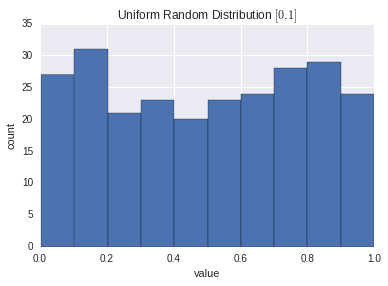

In [216]:
plt.hist(np.random.random(250))
plt.title('Uniform Random Distribution $[0,1]$')
plt.xlabel('value')
plt.ylabel('count')

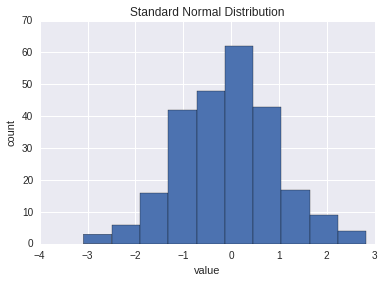

In [217]:
plt.hist(np.random.randn(250))
plt.title('Standard Normal Distribution')
plt.xlabel('value')
plt.ylabel('count')

The `shuffle` function shuffles an array in place:

In [218]:
a = np.arange(0,10)
np.random.shuffle(a)
a

array([4, 1, 9, 5, 6, 0, 7, 8, 2, 3])

The `permutation` function does the same thing but first makes a copy:

In [219]:
a = np.arange(0,10)
print(np.random.permutation(a))
print(a)

[9 2 5 4 8 1 6 0 7 3]
[0 1 2 3 4 5 6 7 8 9]


The `choice` function provides a powerful way of creating synthetic data sets of discrete data:

In [220]:
np.random.choice(['m','f'], 20, p=[0.25,0.75])

array(['f', 'f', 'f', 'f', 'f', 'f', 'f', 'f', 'm', 'f', 'f', 'f', 'm',
       'f', 'm', 'f', 'f', 'm', 'f', 'f'], 
      dtype='|S1')

## Resources

* [NumPy Reference Documentation](http://docs.scipy.org/doc/numpy/reference/)
* [Python Scientific Lecture Notes](http://scipy-lectures.github.io/index.html), Edited by Valentin Haenel,
Emmanuelle Gouillart and Gaël Varoquaux.
* [Lectures on Scientific Computing with Python](https://github.com/jrjohansson/scientific-python-lectures), J.R. Johansson.
* [Introduction to Scientific Computing in Python](http://nbviewer.ipython.org/github/jakevdp/2014_fall_ASTR599/tree/master/), Jake Vanderplas.